In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
import warnings
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time

#Setting options
#init_notebook_mode(connected=True)
#warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FastICA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import SGD, Adam

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
newdf1 = pd.read_csv('weatheraus.csv')
newdf1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48,ENE,SW,6,20,20,13,1006.3,1004.4,2,5,26.6,33.4,No,0.0,No
1,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37,SSE,SSE,19,19,30,8,1012.9,1012.1,1,1,20.3,27.0,No,0.0,No
2,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46,NNE,NNW,30,15,42,22,1012.3,1009.2,1,6,28.7,34.9,No,0.0,No
3,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31,WNW,WSW,6,6,37,22,1012.7,1009.1,1,5,29.1,35.6,No,0.0,No
4,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35,NW,WNW,17,13,19,15,1010.7,1007.4,1,6,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6/20/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35,SE,NE,9,20,63,32,1013.9,1010.5,0,1,24.5,32.3,No,0.0,No
56416,6/21/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37,SE,SE,13,11,56,28,1014.6,1011.2,7,0,24.8,32.0,No,0.0,No
56417,6/22/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33,E,W,17,11,46,23,1015.3,1011.8,0,0,24.8,32.1,No,0.0,No
56418,6/23/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26,SE,NNW,9,17,62,58,1014.9,1010.7,1,1,24.8,29.2,No,0.0,No


In [9]:
#checking for NA
newdf1.isnull().sum()


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

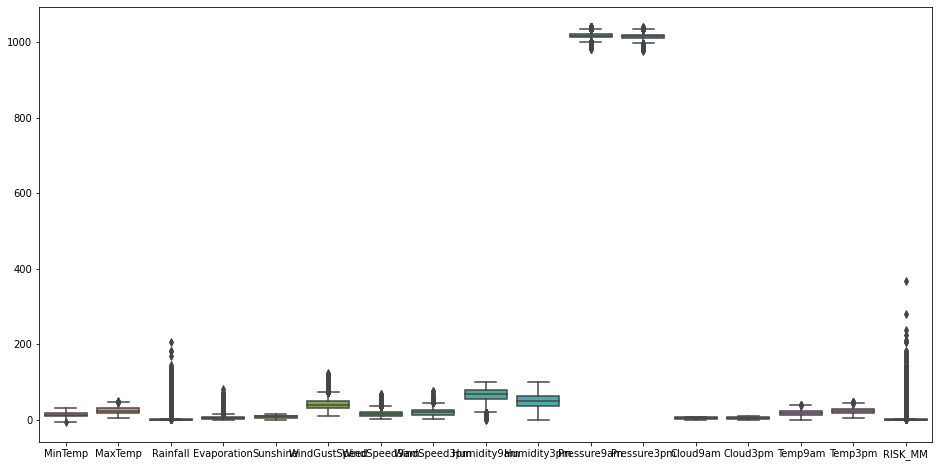

In [10]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(data = newdf1 )

In [0]:
#From the given dataset description, it is given that we should remove RISK_MM column, so it will be dropped as follow:
newdf1.drop(['RISK_MM'], axis=1, inplace=True)

In [12]:
#Exploring categorical values:
categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
#View categorical values:
newdf1[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,1/1/2009,Cobar,SSW,ENE,SW,No,No
1,1/2/2009,Cobar,S,SSE,SSE,No,No
2,1/4/2009,Cobar,NNE,NNE,NNW,No,No
3,1/5/2009,Cobar,WNW,WNW,WSW,No,No
4,1/6/2009,Cobar,WNW,NW,WNW,No,No


In [14]:
#Frequency count of categorical variables:
for var in categorical: 
    
    print(newdf1[var].value_counts())

1/20/2009     25
2/2/2009      25
4/16/2010     25
10/29/2010    25
6/6/2010      25
              ..
1/18/2008      1
3/10/2008      1
1/14/2008      1
6/21/2008      1
1/23/2008      1
Name: Date, Length: 3416, dtype: int64
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791

In [15]:
#check for cardinality 
for var in categorical:
    
    print(var, ' contains ', len(newdf1[var].unique()), ' labels')

Date  contains  3416  labels
Location  contains  26  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


In [16]:
#feature engineering of date variable

newdf1['Date'].dtypes

dtype('O')

In [0]:
# parse the dates, currently coded as strings, into datetime format

newdf1['Date'] = pd.to_datetime(newdf1['Date'])

In [18]:
# extract year from date

newdf1['Year'] = newdf1['Date'].dt.year

newdf1['Year'].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: Year, dtype: int64

In [19]:
# extract month from date

newdf1['Month'] = newdf1['Date'].dt.month

newdf1['Month'].head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [20]:
# extract day from date

newdf1['Day'] = newdf1['Date'].dt.day

newdf1['Day'].head()

0    1
1    2
2    4
3    5
4    6
Name: Day, dtype: int64

In [21]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  int64         
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  int64         
 12  WindSpeed3pm   56420 non-null  int64         
 13  Humidity9am    56420 non-null  int64         
 14  Humidity3pm    56420 non-null  int64         
 15  Pressure9am    5642

In [0]:
#drop the original Date variable

newdf1.drop('Date', axis=1, inplace = True)

In [23]:
#exploring other categorical variables one by one:

categorical = [var for var in newdf1.columns if newdf1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [0]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method
newdf2=pd.get_dummies(newdf1)

In [0]:
#Dropping extra dummy variables:
newdf2=newdf2.drop(['Location_AliceSprings','WindGustDir_E','WindDir9am_E','WindDir3pm_E','RainToday_No','RainTomorrow_No'], axis=1)

In [26]:
newdf2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,...,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.00000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2012.221074,6.425009,15.723910,0.052340,0.043318,0.019107,0.009465,0.024459,0.054272,0.034367,0.033641,0.051914,0.045977,0.033906,0.043690,0.043672,0.035590,0.053616,0.051631,0.033020,0.029741,0.029954,0.050868,0.042875,...,0.064445,0.069656,0.058401,0.069089,0.071819,0.073750,0.052978,0.067192,0.069692,0.060262,0.088036,0.060085,0.057905,0.053456,0.050585,0.060635,0.068770,0.069000,0.051861,0.059482,0.065704,0.051719,0.053828,0.069940,0.065633,0.064268,0.060085,0.043247,0.049025,0.048334,0.072829,0.073609,0.059057,0.061769,0.07111,0.069514,0.056717,0.068345,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,2.450978,3.451383,8.782527,0.222713,0.203574,0.136901,0.096826,0.154472,0.226555,0.182172,0.180304,0.221856,0.209436,0.180990,0.204407,0.204367,0.185268,0.225260,0.221282,0.178691,0.169874,0.170462,0.219731,0.202577,...,0.245547,0.254569,0.234503,0.253608,0.258189,0.261367,0.223991,0.250357,0.254629,0.237974,0.283350,0.237647,0.233566,0.224943,0.219150,0.238661,0.253065,0.253457,0.221748,0.236528,0.247766,0.221462,0.225681,0.255048,0.247641,0.245232,0.237647,0.203415,0.215923,0.214473,0.259858,0.261135,0.235734,0.240737,0.25701,0.254329,0.231304,0.252338,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [27]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    56420 non-null  float64
 1   MaxTemp                    56420 non-null  float64
 2   Rainfall                   56420 non-null  float64
 3   Evaporation                56420 non-null  float64
 4   Sunshine                   56420 non-null  float64
 5   WindGustSpeed              56420 non-null  int64  
 6   WindSpeed9am               56420 non-null  int64  
 7   WindSpeed3pm               56420 non-null  int64  
 8   Humidity9am                56420 non-null  int64  
 9   Humidity3pm                56420 non-null  int64  
 10  Pressure9am                56420 non-null  float64
 11  Pressure3pm                56420 non-null  float64
 12  Cloud9am                   56420 non-null  int64  
 13  Cloud3pm                   56420 non-null  int

In [0]:
x2 = newdf2.iloc[:,1:90].values 

y2 = newdf2.iloc[:,90].values

In [0]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x2, y2 , test_size = 0.3, random_state = 0)

In [0]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [0]:
K MEANS

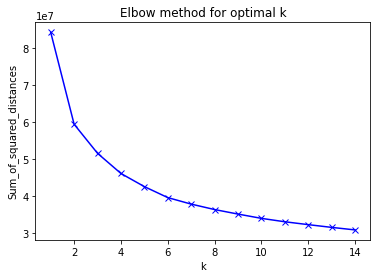

In [54]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(x2)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on Train Data')

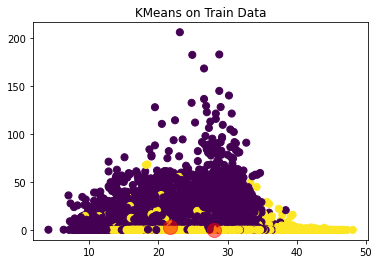

In [37]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(x2)
yp=kmeans.predict(x2)
plt.scatter(x2[:, 0], x2[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on Train Data')

# Expectation Maximization


Text(0.5, 1.0, 'Expectation Maximization on Train Data')

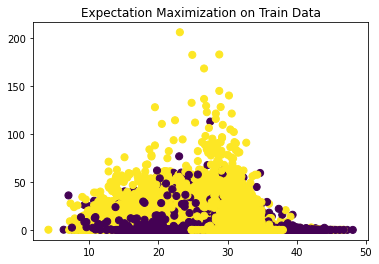

In [47]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(x2)
em_pred = em.predict(x2)
plt.scatter(x2[:, 0], x2[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on Train Data')

## PCA


In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train=pca.fit_transform(x2)

In [79]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(89,)

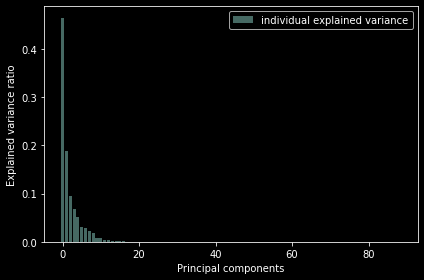

In [81]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(89), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [0]:
pca = PCA(n_components=3)
pca_X_train=pca.fit_transform(x2)
pca_X_test=pca.fit_transform(x2)

In [83]:
pca.get_covariance()

array([[ 2.30878815e+01, -7.90870563e+00,  9.09104349e+00, ...,
         1.23645335e-02, -2.59665164e-03, -6.62457715e-01],
       [-7.90870563e+00,  1.21278528e+01, -3.34456907e+00, ...,
         2.18206164e-02,  1.42834017e-02,  4.82200199e-01],
       [ 9.09104349e+00, -3.34456907e+00,  1.10916469e+01, ...,
         1.59807179e-02,  3.09426964e-03, -2.91618919e-01],
       ...,
       [ 1.23645335e-02,  2.18206164e-02,  1.59807179e-02, ...,
         5.97103784e+00,  1.42044815e-04,  1.45882373e-03],
       [-2.59665164e-03,  1.42834017e-02,  3.09426964e-03, ...,
         1.42044815e-04,  5.97079483e+00,  1.02110546e-03],
       [-6.62457715e-01,  4.82200199e-01, -2.91618919e-01, ...,
         1.45882373e-03,  1.02110546e-03,  6.00875665e+00]])

In [94]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(3,)

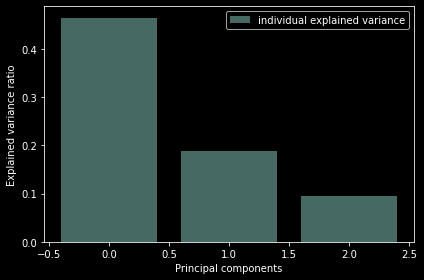

In [95]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## k- means with PCA

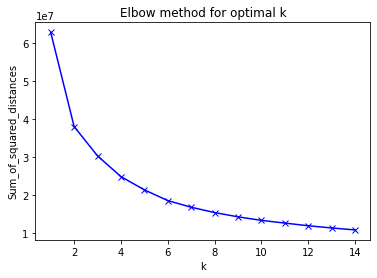

In [96]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(pca_X_train)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on full dataset')

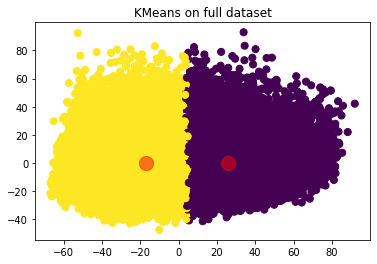

In [100]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(pca_X_train)
yp=kmeans.predict(pca_X_train)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

## Expectation Maximization


Text(0.5, 1.0, 'Expectation Maximization on full data set')

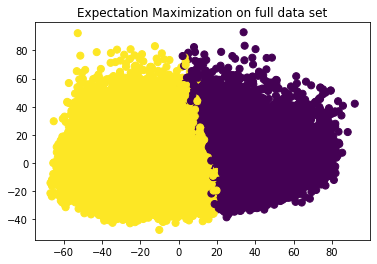

In [99]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(pca_X_train)
em_pred = em.predict(pca_X_train)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## ICA


In [0]:
##ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_ICA=ICA.fit_transform(x2)

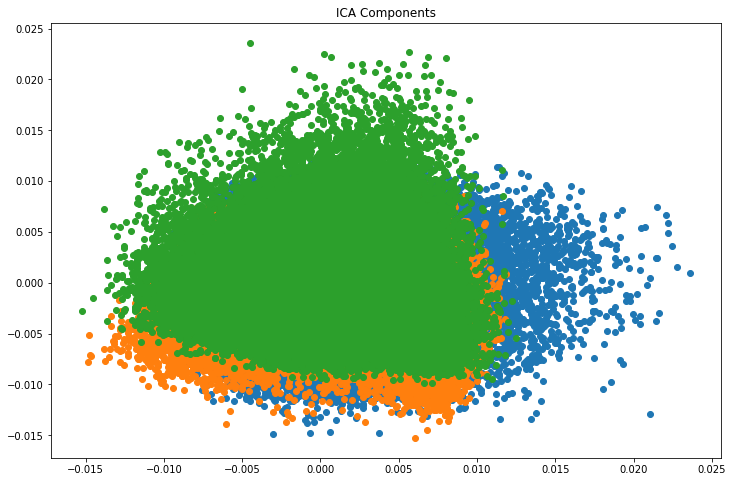

In [115]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ICA[:,0], X_ICA[:,1])
plt.scatter(X_ICA[:,1], X_ICA[:,2])
plt.scatter(X_ICA[:,2], X_ICA[:,0])


Text(0.5, 1.0, 'KMeans on full data')

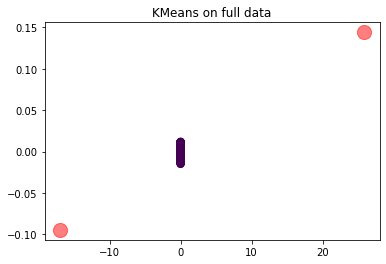

In [122]:
kmeans_ica = KMeans(n_clusters=2, random_state=100)
kmeans_ica.fit(X_ICA)
yp=kmeans.predict(X_ICA)
plt.scatter(X_ICA[:, 0], X_ICA[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full data')

Text(0.5, 1.0, 'Expectation Maximization on full data set')

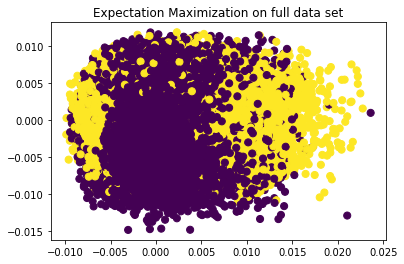

In [117]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_ICA)
em_pred = em.predict(X_ICA)
plt.scatter(X_ICA[:, 0], X_ICA[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## RCA


In [0]:
##Randomized Projection
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=3, eps=0.1, random_state=420)
rca_X = grp.fit_transform(x2)

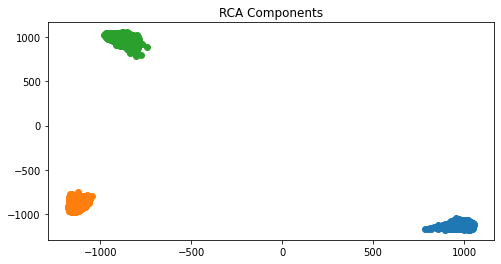

In [32]:
plt.figure(figsize=(8,4))
plt.title('RCA Components')
plt.scatter(rca_X[:,0], rca_X[:,1])
plt.scatter(rca_X[:,1], rca_X[:,2])
plt.scatter(rca_X[:,2], rca_X[:,0])

Text(0.5, 1.0, 'KMeans on full dataset')

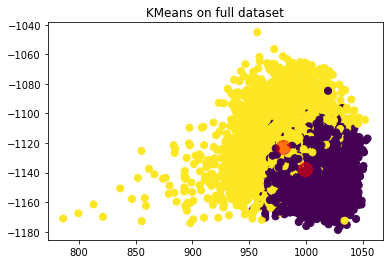

In [124]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) 
kmeans.fit(rca_X)
yp=kmeans.predict(rca_X)
plt.scatter(rca_X[:, 0], rca_X[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

Text(0.5, 1.0, 'Expectation Maximization on full data set')

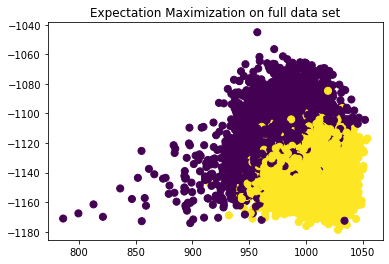

In [125]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(rca_X)
em_pred = em.predict(rca_X)
plt.scatter(rca_X[:, 0], rca_X[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

In [0]:
##Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=20,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)

In [35]:
features = feature_selector.fit(x2,y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:  2.0min finished

[2020-05-07 02:55:56] Features: 1/20 -- score: 0.8060111341541607[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:  3.6min finished

[2020-05-07 02:59:32] Features: 2/20 -- score: 0.8226572992178658[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:  4.3min finished

[2020-05-07 03:03:51] Features: 3/20 -- score: 0.8228344480241816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [36]:
filtered_features= features.k_feature_idx_
filtered_features

(3, 8, 10, 12, 19, 20, 21, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 42)

In [0]:
X_feature = np.array(newdf2.iloc[:,[3, 8, 10, 12, 19, 20, 21, 23, 24, 26, 27, 29, 30, 32, 33, 34, 35, 36, 39, 42]])
y_feature = np.array(newdf2['RainTomorrow_Yes'])

In [38]:
X_feature.shape

(56420, 20)

In [0]:
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y_feature, test_size=0.3, random_state=1)

In [40]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X_feature)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'KMeans on full dataset')

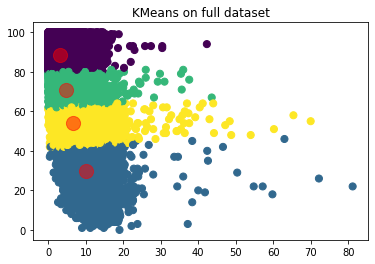

In [41]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X_feature)
yp=kmeans.predict(X_feature)
plt.scatter(X_feature[:, 0], X_feature[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

## Expectation Maximization


Text(0.5, 1.0, 'Expectation Maximization on full data set')

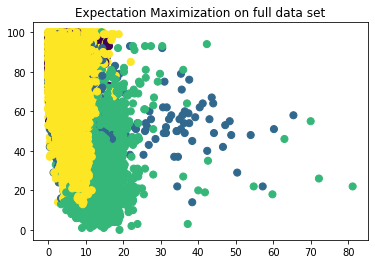

In [42]:
## Expectation maximization analysis on Full data set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=4,random_state=0,covariance_type='tied')
em.fit(X_feature)
em_pred = em.predict(X_feature)
plt.scatter(X_feature[:, 0], X_feature[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## ANN
**(After PCA)**


In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X2_ann=pca.fit_transform(x2)

In [0]:
X1_train_pca, X1_test_pca, y1_train, y1_test = train_test_split(pca_X2_ann, y2, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train_pca = sc.fit_transform(X1_train_pca)
X1_test_pca = sc.transform(X1_test_pca)

In [33]:
# Initialising the ANN

#changing the number of nodes to 16
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=89, units=16, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X1_train_pca, y1_train, batch_size = 10, epochs = 400,validation_split=0.3)

Train on 27645 samples, validate on 11849 samples
Epoch 1/400
27645/27645 [==============================] - 5s 164us/step - loss: 0.3603 - accuracy: 0.8424 - val_loss: 0.3385 - val_accuracy: 0.8545
Epoch 2/400
27645/27645 [==============================] - 4s 152us/step - loss: 0.3212 - accuracy: 0.8604 - val_loss: 0.3312 - val_accuracy: 0.8580
Epoch 3/400
27645/27645 [==============================] - 4s 142us/step - loss: 0.3109 - accuracy: 0.8664 - val_loss: 0.3283 - val_accuracy: 0.8595
Epoch 4/400
27645/27645 [==============================] - 4s 145us/step - loss: 0.3048 - accuracy: 0.8684 - val_loss: 0.3291 - val_accuracy: 0.8607
Epoch 5/400
27645/27645 [==============================] - 4s 154us/step - loss: 0.2997 - accuracy: 0.8724 - val_loss: 0.3302 - val_accuracy: 0.8590
Epoch 6/400
27645/27645 [==============================] - 4s 153us/step - loss: 0.2959 - accuracy: 0.8733 - val_loss: 0.3316 - val_accuracy: 0.8573
Epoch 7/400
27645/27645 [==============================]

In [34]:
# Predicting the Test set results
y_pred_ann_pca = classifier.predict_classes(X1_test_pca)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y1_test, y_pred_ann_pca)
accu=accuracy_score(y1_test,y_pred_ann_pca)
print(cm,"\n")
print("The accuracy is",accu)

[[12108  1050]
 [ 1718  2050]] 

The accuracy is 0.836464610658159


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


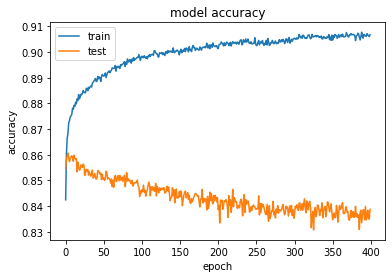

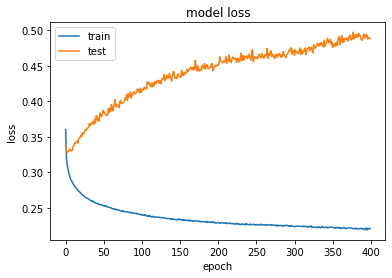

In [35]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## TASK 5


In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(X1_train)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(X1_train)
em_probs = em.predict_proba(X1_train)

train_df = pd.DataFrame()
train_df['KM_Pred']=prediction
train_df['EM_Prob']=em_probs[:,1]
train_df['y']=y1_train
train_df

,KM_Pred,EM_Prob,y
0,1,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,0
...,...,...,...
39489,0,0.0,0
39490,1,1.0,0
39491,1,0.0,1
39492,1,0.0,0


In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(X1_test)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(X1_test)
em_probs = em.predict_proba(X1_test)

test_df = pd.DataFrame()
test_df['KM_Pred']=prediction
test_df['EM_Prob']=em_probs[:,1]
test_df['y']=y1_test
test_df

,KM_Pred,EM_Prob,y
0,1,0.0,0
1,0,0.0,0
2,0,1.0,1
3,1,0.0,0
4,1,0.0,0
...,...,...,...
16921,1,0.0,0
16922,1,0.0,0
16923,0,1.0,0
16924,1,0.0,0


In [0]:
#Creating binary classification target variable
train_y=train_df[['y']].values
train_x=train_df.drop(columns=['y'],axis=1).values
test_y=test_df[['y']]
test_x=test_df.drop(columns=['y'],axis=1)

In [80]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(train_x, train_y, batch_size = 10, epochs=100,validation_split=0.3)

Train on 27645 samples, validate on 11849 samples
Epoch 1/100
27645/27645 [==============================] - 5s 165us/step - loss: 0.5281 - accuracy: 0.7815 - val_loss: 0.5071 - val_accuracy: 0.7790
Epoch 2/100
27645/27645 [==============================] - 5s 163us/step - loss: 0.5009 - accuracy: 0.7815 - val_loss: 0.5005 - val_accuracy: 0.7790
Epoch 3/100
27645/27645 [==============================] - 4s 163us/step - loss: 0.4993 - accuracy: 0.7815 - val_loss: 0.4993 - val_accuracy: 0.7790
Epoch 4/100
27645/27645 [==============================] - 5s 164us/step - loss: 0.4982 - accuracy: 0.7815 - val_loss: 0.4979 - val_accuracy: 0.7790
Epoch 5/100
27645/27645 [==============================] - 5s 164us/step - loss: 0.4974 - accuracy: 0.7815 - val_loss: 0.4973 - val_accuracy: 0.7790
Epoch 6/100
27645/27645 [==============================] - 5s 166us/step - loss: 0.4972 - accuracy: 0.7815 - val_loss: 0.4972 - val_accuracy: 0.7790
Epoch 7/100
27645/27645 [==============================]

In [81]:
# Predicting the Test set results
y_pred = classifier.predict_classes(test_x)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(test_y, y_pred)
accu=accuracy_score(test_y,y_pred)
print(cm,"\n")
print("The accuracy is",accu)



[[13158     0]
 [ 3768     0]] 

The accuracy is 0.7773839064161645


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


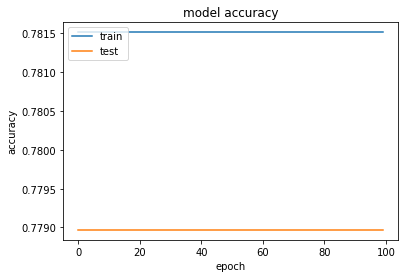

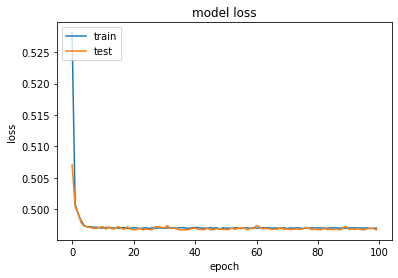

In [82]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()